Fit Exp2D
=========================================
In this example, we simulate a groudn truth bidimensional MHP with exponential
kernels.
We estimate the parameters of this MHP using ASLSD, plot the path of the
solver, the fitted kernels and the adjacency matrix of the fit.
"""

In [1]:
import itertools
import os
import sys

# add the path of packages to system path
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import numpy as np
import matplotlib.pyplot as plt

from aslsd.basis_kernels.basis_kernel_exponential import ExponentialKernel
from aslsd.kernels.kernel import KernelModel
from aslsd.models.mhp import MHP

We first define a ground-truth 2-dimensional exponential Hawkes process, and specify its parameter values.

In [2]:
#Specify the ground-truth model
d = 2
true_kernel_matrix = [[KernelModel([ExponentialKernel()]) for j in range(d)]
                      for i in range(d)]
true_mhp = MHP(true_kernel_matrix)

In [3]:

# Define true parameter values
true_mu = np.array([1.5, 1.])

true_omega = np.ones((2, 2))
true_omega[0][0] = .2
true_omega[0][1] = .6
true_omega[1][0] = .7
true_omega[1][1] = .1

true_beta = np.ones((2, 2))
true_beta[0][0] = 1.
true_beta[0][1] = 1.5
true_beta[1][0] = 2.
true_beta[1][1] = 1.3

true_ker_param = np.ones((d, d, 2))
for i, j in itertools.product(range(d), range(d)):
    true_ker_param[i][j][0] = true_omega[i][j]
    true_ker_param[i][j][1] = true_beta[i][j]

We now simulate a path of this process.

In [4]:
T_f = 10**5
list_times = true_mhp.simulate(T_f, mu=true_mu, kernel_param=true_ker_param,
                               seed=1234, verbose=True)

Simulating events...
Simulation Complete,  1098456  events simulated.


We print the first 20 events of each type, to give a feel for the data.

In [5]:
print(list_times[0][0:20])
print(list_times[1][0:20])

[1.01426241 1.08095352 1.47864284 2.21923938 2.53121404 2.67519923
 2.73448279 3.13207389 3.79836338 4.61285877 4.853765   5.26739574
 5.66990691 5.69596862 5.97239767 6.02847663 6.40310506 6.50227405
 6.74922212 7.07950919]
[0.67631771 1.01449015 2.49185425 2.73283162 2.75327538 2.76644973
 2.84718093 2.91706702 2.94045974 3.46831884 3.85784865 4.11501722
 4.7847848  5.50071511 5.75999424 5.81623278 6.1128127  7.69883712
 7.86294082 8.11193229]


We now define another model, of the same type as the ground-truth, and estimate the parameters of the model using our observed points. In this case, we let our learning rate collapse exponentially through the training period.

In [6]:
#Define a model
kernel_matrix = [[KernelModel([ExponentialKernel()]) for j in range(d)]
                 for i in range(d)]
mhp = MHP(kernel_matrix)
kwargs = {'is_log_param': True, 'is_log_grad': True,
          'learning_rate_type': 'exponential'}

In [7]:
#Fit the model
mhp.fit(list_times, T_f, n_iter=1000, seed=1234, verbose=True, **kwargs)
fit_log = mhp.fit_log

100%|██████████| 1000/1000 [40:09<00:00,  2.41s/it]


Finally, we plot the results

C:\git\aslsd\plots\graphic_tools.py:174: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout(pad=pad)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F16B51AC0>,
      dtype=object)

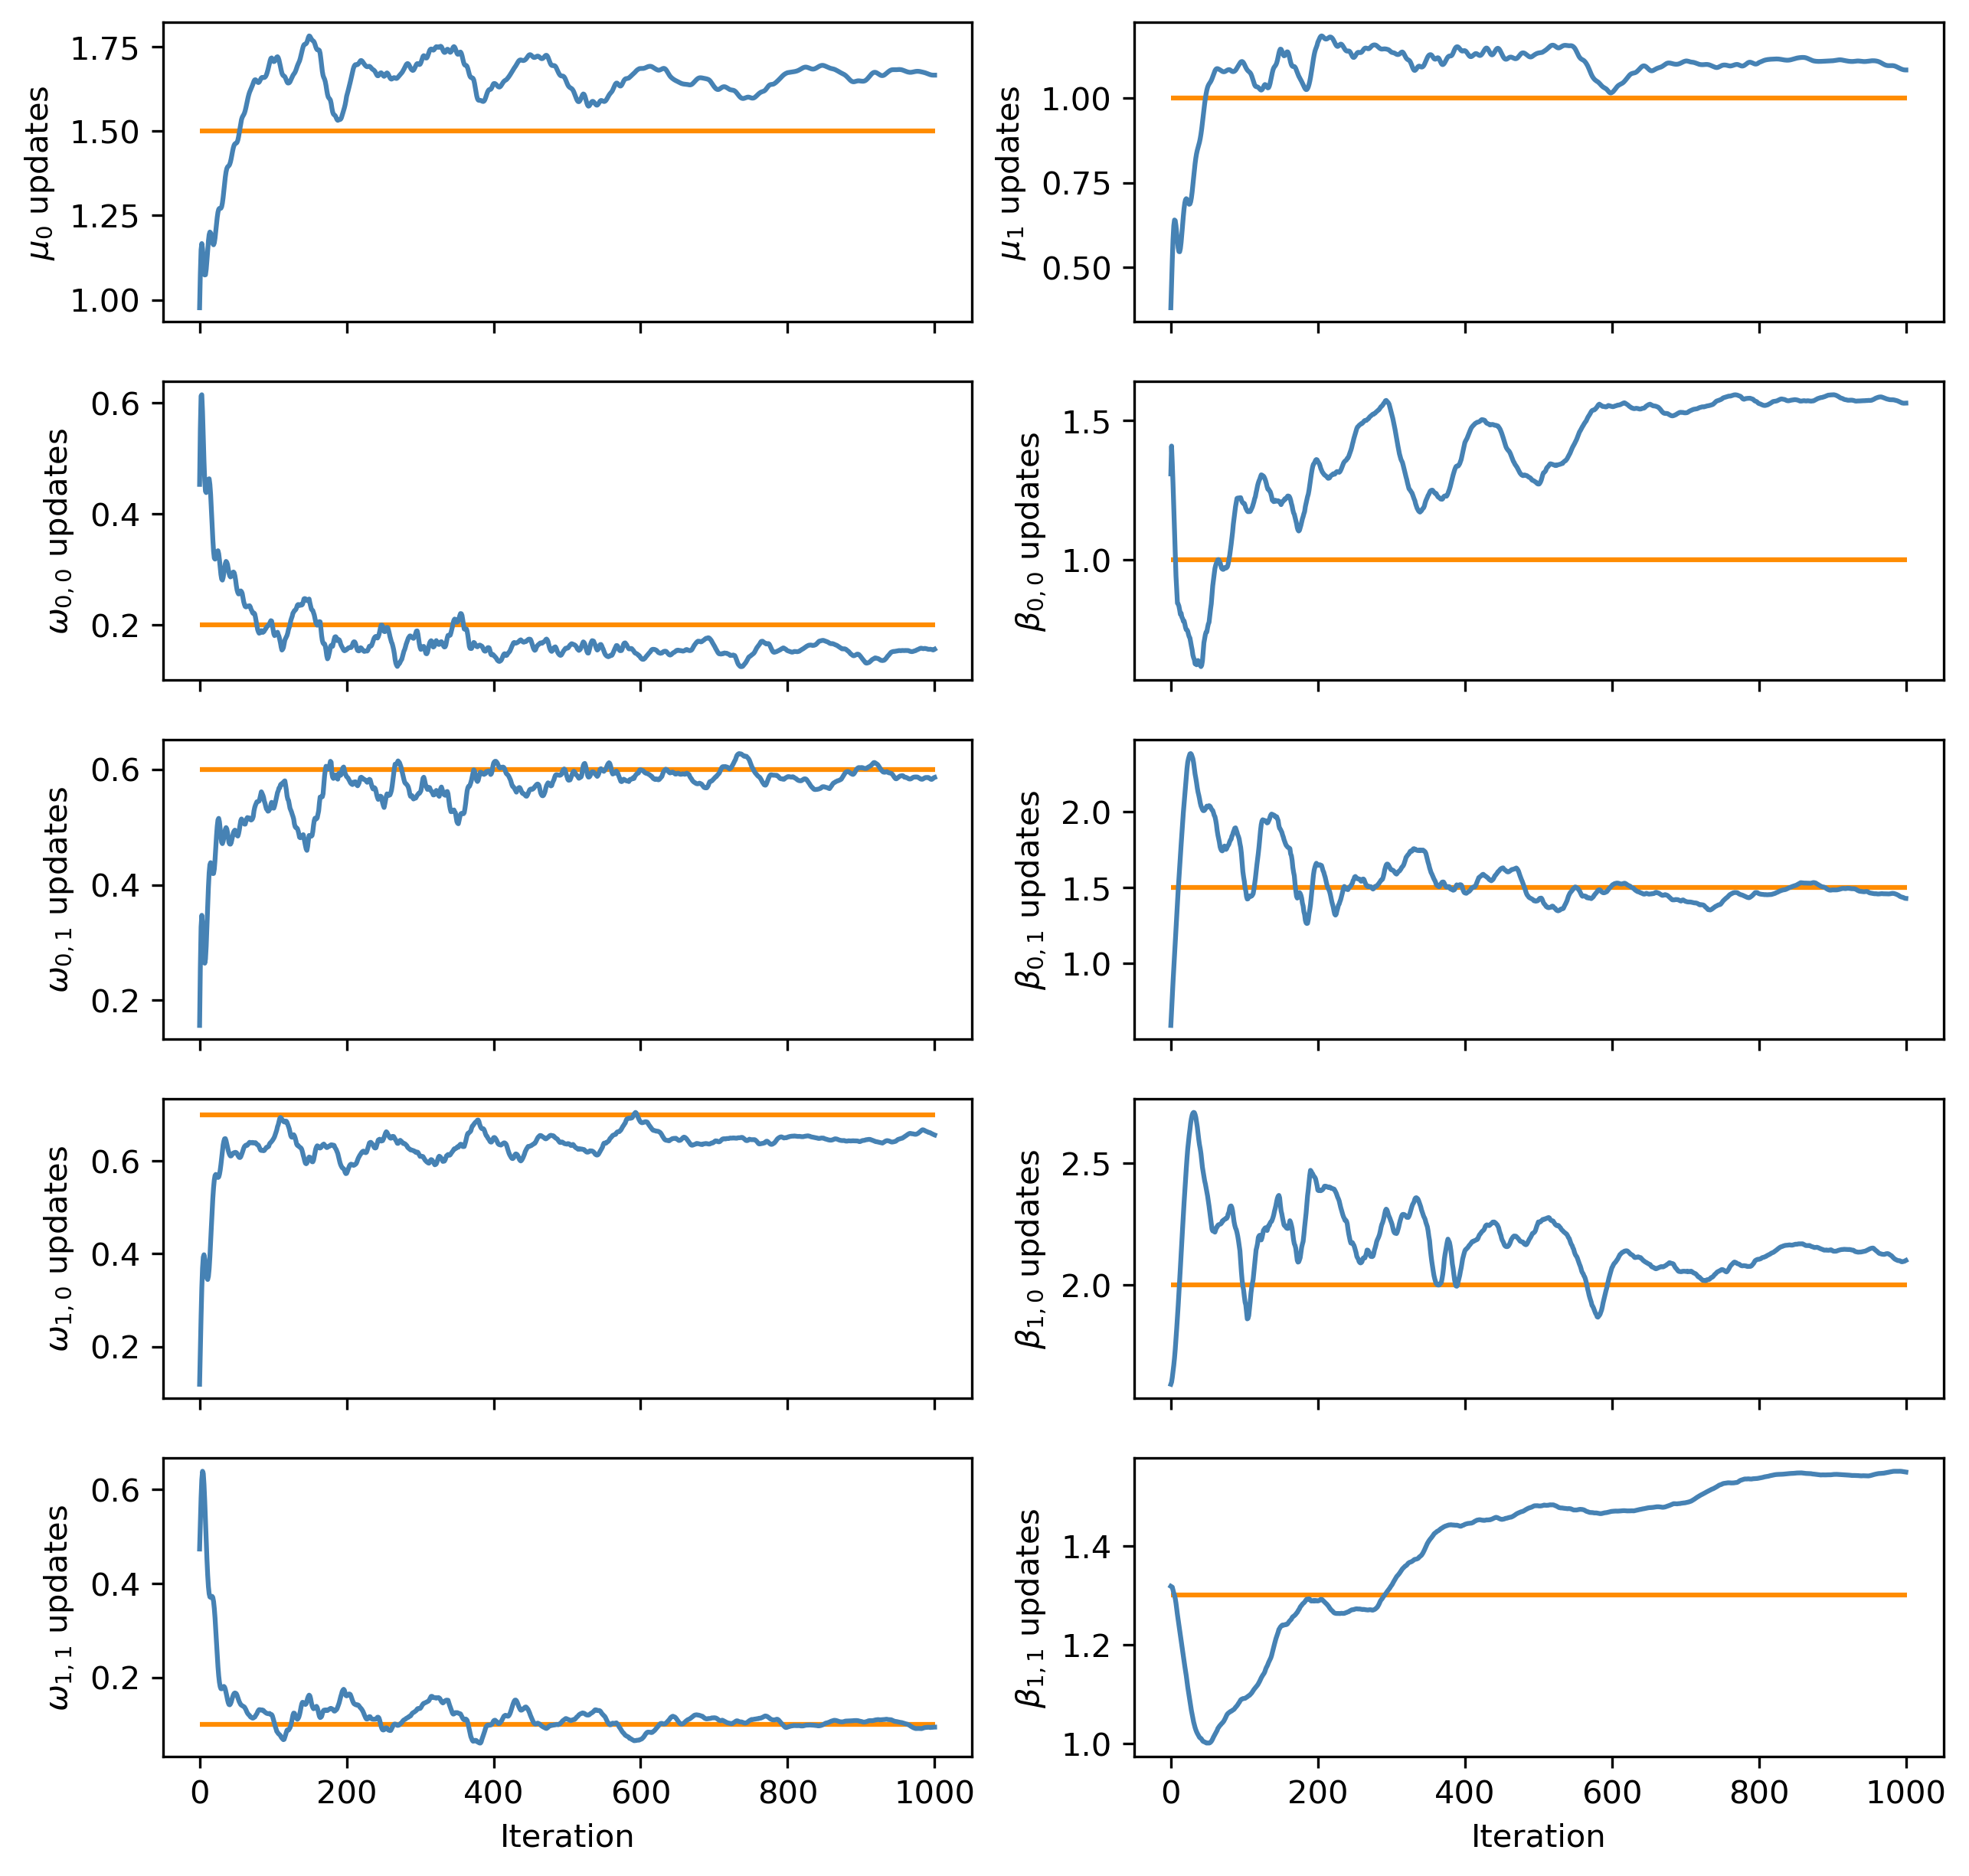

In [9]:
mhp.plot_solver_path(true_mu=true_mu, true_ker_param=true_ker_param)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F1681A700>,
      dtype=object)

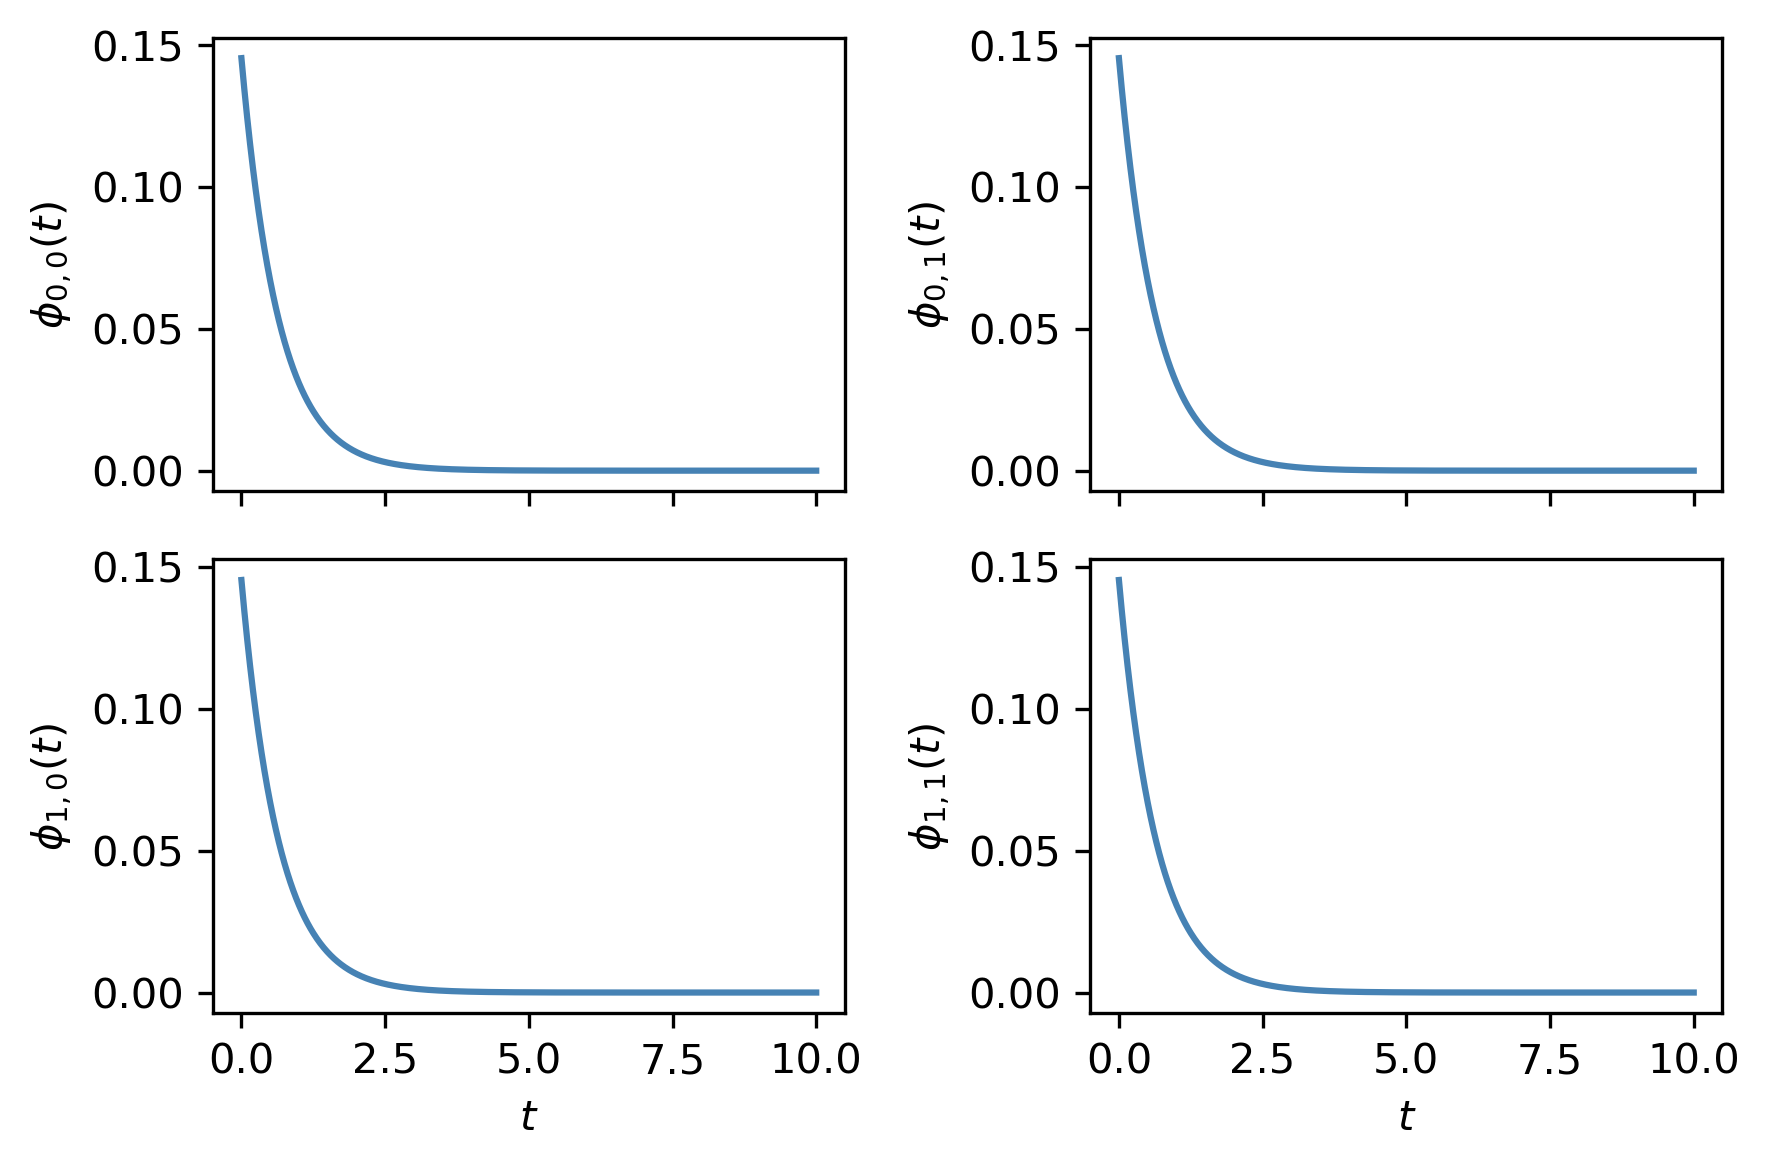

In [13]:
mhp.plot_kernels()

C:\git\aslsd\plots\graphic_tools.py:652: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 1800x1200 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17f16bfdfa0>)

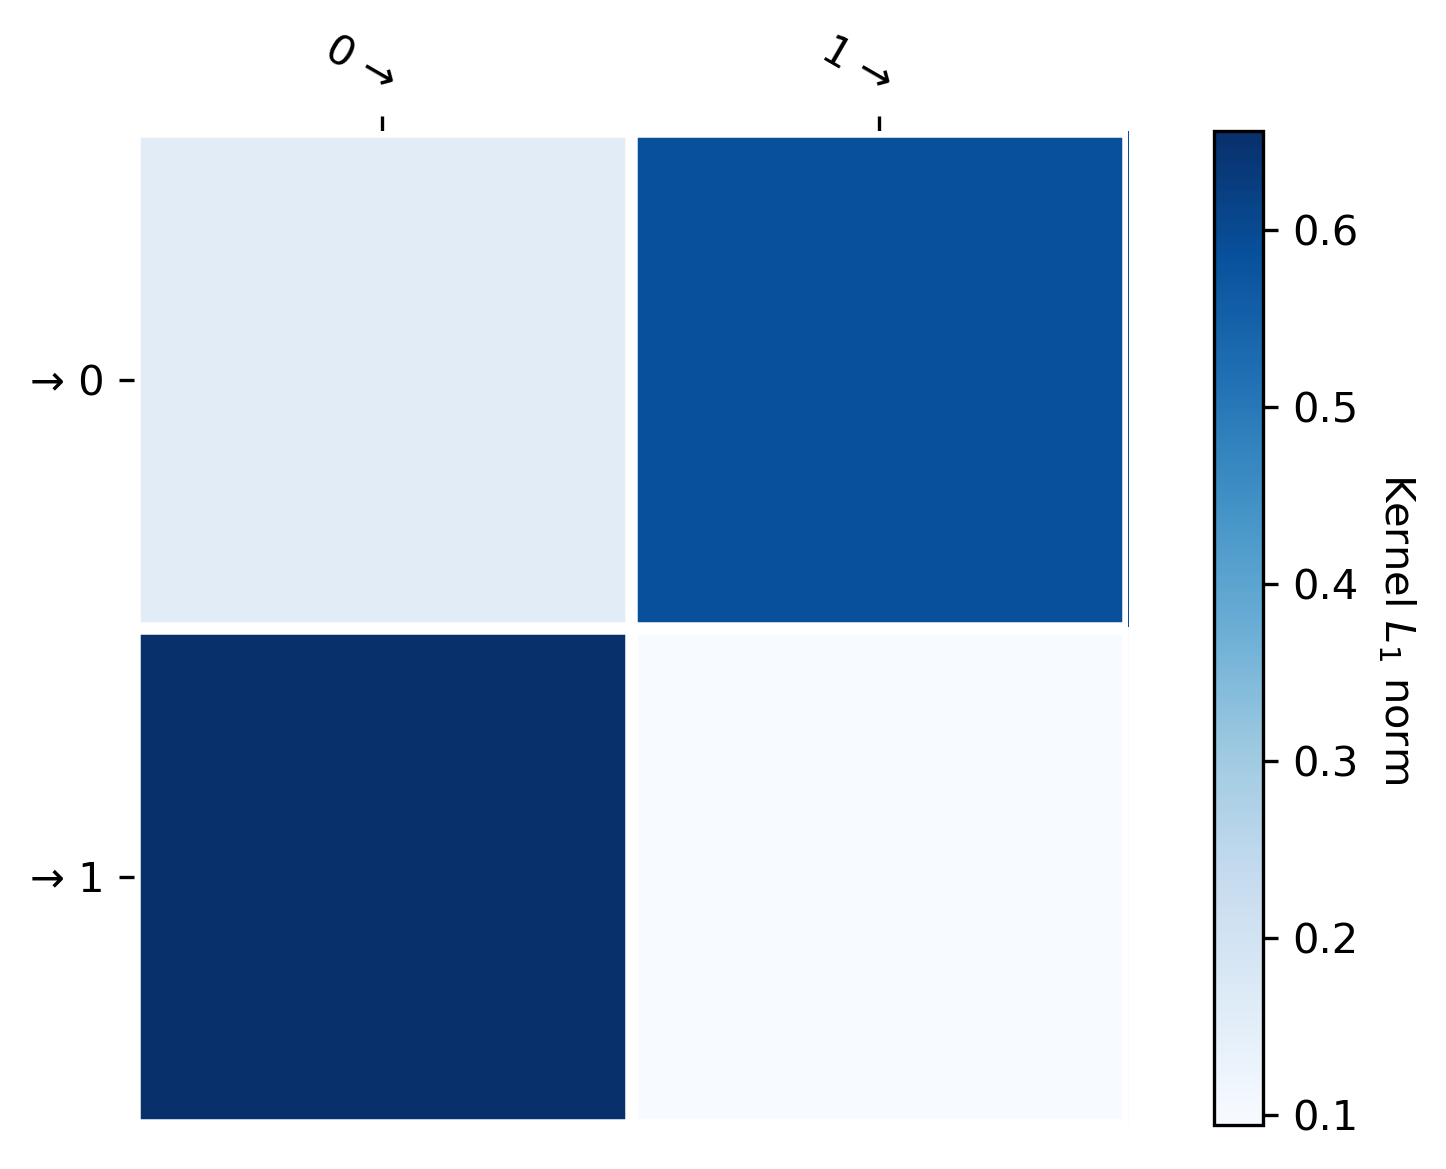

In [11]:
mhp.plot_adjacency_matrix()